In [1]:
import os 
import numpy as np
from PIL import Image
import torch
import cv2

from backbone.get_models import get_model

from collections import OrderedDict

import random
import argparse
import time

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def normalization(rgb_img,mean_list=[0.485, 0.456, 0.406],std_list=[0.229, 0.224, 0.225]):
    MEAN = 255 * np.array(mean_list)
    STD = 255 * np.array(std_list)
    rgb_img = rgb_img.transpose(-1, 0, 1)
    norm_img = (rgb_img - MEAN[:, None, None]) / STD[:, None, None]
    
    return norm_img

def image_preprocess(img_path,resize=224,mean_list=[0.485, 0.456, 0.406],std_list=[0.229, 0.224, 0.225]):
    img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (resize, resize))
    view_image = img.copy()
    
    img = normalization(img,mean_list,std_list)
    
    img = torch.from_numpy(img).unsqueeze(0).float()
    return view_image,img

In [3]:
path = "aihub_dataset/FaceMask/Training_unmask_aligned112.csv"
lines = open(path,'r').readlines()

In [8]:
# sample image path
img_path = lines[1].strip().split(",")[-1]

In [10]:
# model init (mobilenetv3)
model_name = 'mobilenetv3-small'
num_classes=2
input_size=112
model_path = "FaceMask_mbnv3-small_230418.pth"

model = get_model(model_name,num_classes,load_type=1,input_size=input_size)

load_weight = torch.load(model_path)
new_state_dict = OrderedDict()
for n, v in load_weight.items():
    name = n.replace("module.","") 
    new_state_dict[name] = v

model.load_state_dict(new_state_dict)
_ = model.eval()

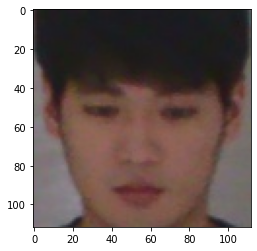

In [19]:
# input image load
view,input_img = image_preprocess(img_path,resize=input_size)

plt.imshow(view)

In [20]:
output = model(input_img) # [[ unmask , mask ]]

In [21]:
output

tensor([[ 6.0251, -6.1455]], grad_fn=<AddmmBackward0>)